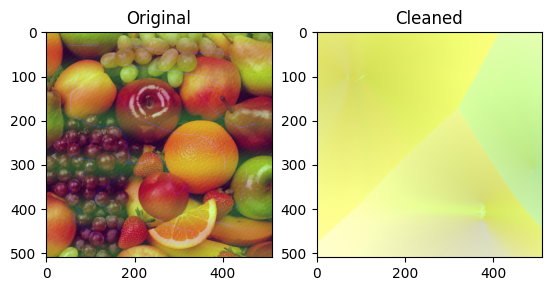

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the corrupted image
image = cv2.imread('fruits.png')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold to binarize
_, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

# Apply morphological operations
kernel = np.ones((5, 5), np.uint8)
cleaned = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# Inpaint the cleaned areas
inpainted = cv2.inpaint(image, cleaned, 3, cv2.INPAINT_TELEA)

# Show results
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(122), plt.imshow(cv2.cvtColor(inpainted, cv2.COLOR_BGR2RGB)), plt.title('Cleaned')
plt.show()


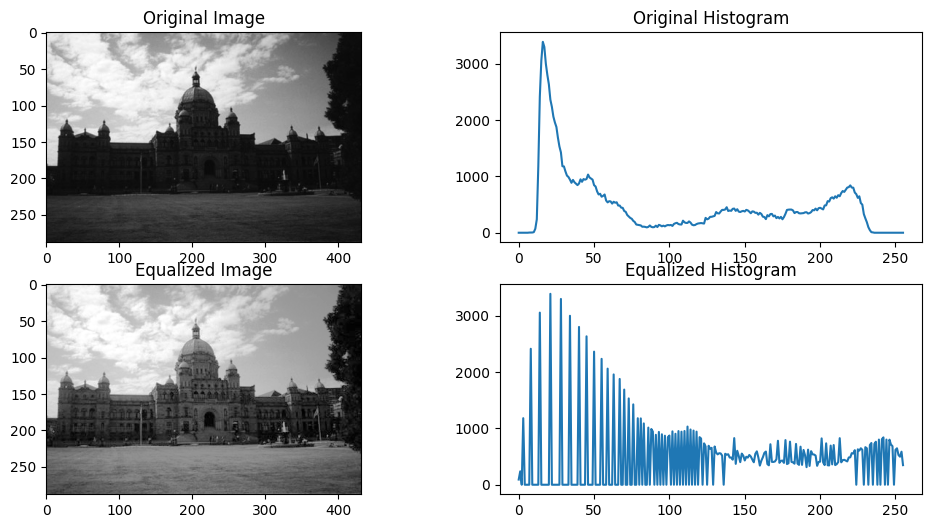

In [2]:
# Read the low-exposure image
image = cv2.imread('badexposure.jpg', cv2.IMREAD_GRAYSCALE)

# Compute original histogram
original_hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Apply histogram equalization
equalized = cv2.equalizeHist(image)

# Compute equalized histogram
equalized_hist = cv2.calcHist([equalized], [0], None, [256], [0, 256])

# Display images and histograms
plt.figure(figsize=(12, 6))
plt.subplot(221), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(222), plt.plot(original_hist), plt.title('Original Histogram')
plt.subplot(223), plt.imshow(equalized, cmap='gray'), plt.title('Equalized Image')
plt.subplot(224), plt.plot(equalized_hist), plt.title('Equalized Histogram')
plt.show()


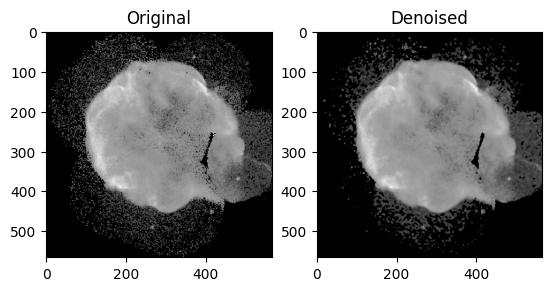

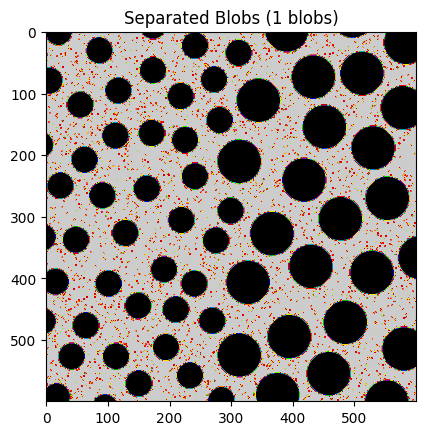

In [3]:
# Part A: Noise Removal
splash = cv2.imread('splash.png')
denoised = cv2.medianBlur(splash, 5)

# Display results
plt.subplot(121), plt.imshow(cv2.cvtColor(splash, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(122), plt.imshow(cv2.cvtColor(denoised, cv2.COLOR_BGR2RGB)), plt.title('Denoised')
plt.show()

# Part B: Blob Separation
blobs = cv2.imread('blobs.png', cv2.IMREAD_GRAYSCALE)
_, thresh = cv2.threshold(blobs, 127, 255, cv2.THRESH_BINARY)

# Find and label connected components
num_labels, labels_im = cv2.connectedComponents(thresh)

# Display results
plt.imshow(labels_im, cmap='nipy_spectral')
plt.title(f'Separated Blobs ({num_labels - 1} blobs)')
plt.show()


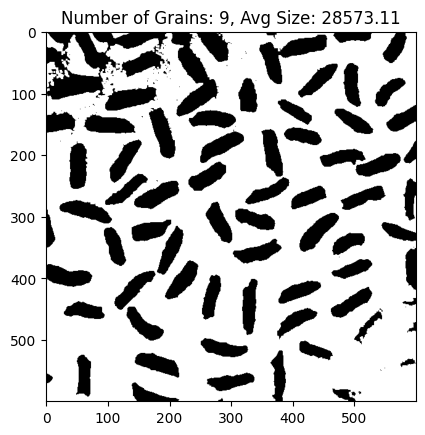

In [4]:
# Read the image
rices = cv2.imread('rices.png', cv2.IMREAD_GRAYSCALE)

# Task A: Detect rice grains
_, thresh = cv2.threshold(rices, 127, 255, cv2.THRESH_BINARY_INV)

# Morphological operations to clean noise
kernel = np.ones((3, 3), np.uint8)
cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Task B: Count and compute average size
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(cleaned)

# Compute average size
sizes = stats[1:, cv2.CC_STAT_AREA]  # Skip the background
average_size = sizes.mean()

# Display results
plt.imshow(cleaned, cmap='gray')
plt.title(f'Number of Grains: {num_labels - 1}, Avg Size: {average_size:.2f}')
plt.show()
